# Using Invistico Airline data, creating a Classification ML model on Customer Satisfaction.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font",size=14)
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [34]:
cs_df=pd.read_csv('Invistico_Airline.csv')
cs_df.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [35]:
cs_df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Out of 23 columns one column, 'Arrival Delay in Minutes', has 393 null values

In [36]:
print('Shape of customer satisfaction Airline data is : {:}'.format(cs_df.shape))

Shape of customer satisfaction Airline data is : (129880, 23)


In [37]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [38]:
def rating(data_columns):
    rating_columns=[]
    col=list(data_columns)
    for j in col:
        if j in list(cs_df.select_dtypes(include=[np.number])):
            if len(cs_df[j].unique())>10:
                continue
            else:
                rating_columns.append(j)
    print(rating_columns,"\n")
    print("Total number of rating columns is : {:}".format(len(rating_columns),))
    
    return cs_df[rating_columns]     

In [39]:
rating(cs_df.columns)

['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding'] 

Total number of rating columns is : 14


,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,0,0,0,2,2,4,2,3,3,0,3,5,3,2
1,0,0,0,3,0,2,2,3,4,4,4,2,3,2
2,0,0,0,3,2,0,2,2,3,3,4,4,4,2
3,0,0,0,3,3,4,3,1,1,0,1,4,1,3
4,0,0,0,3,4,3,4,2,2,0,2,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,5,5,5,3,2,5,2,2,3,3,4,4,4,2
129876,2,3,2,4,2,1,1,3,2,3,3,1,2,1
129877,3,0,3,3,3,2,2,4,4,3,4,2,3,2
129878,3,2,3,2,3,2,2,3,3,2,3,2,1,2


These above 14 columns are the rating field with have values 0 to 5, these are important that which all give an idea regarding how was the experience of a customer with the Airline 

In [40]:
def non_numcol(data_columns):
    columns=list(data_columns)
    obj_col=[]
    print("Value counts for column having len of unique value <4 \n")
    for i in columns:
        if i in list(cs_df.select_dtypes(include=[np.number])):
            continue
        else:
            obj_col.append(i)
            values=cs_df[i].value_counts()
        print("value counts for ",i," :\n{:}".format(values)), 
        print("\n")
    print("Number of non numberical data columns : {:}".format(len(obj_col)))
    
    return cs_df[obj_col]

In [41]:
non_numcol(cs_df.columns)

Value counts for column having len of unique value <4 

value counts for  satisfaction  :
satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64


value counts for  Gender  :
Female    65899
Male      63981
Name: Gender, dtype: int64


value counts for  Customer Type  :
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64


value counts for  Type of Travel  :
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64


value counts for  Class  :
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64


Number of non numberical data columns : 5


,satisfaction,Gender,Customer Type,Type of Travel,Class
0,satisfied,Female,Loyal Customer,Personal Travel,Eco
1,satisfied,Male,Loyal Customer,Personal Travel,Business
2,satisfied,Female,Loyal Customer,Personal Travel,Eco
3,satisfied,Female,Loyal Customer,Personal Travel,Eco
4,satisfied,Female,Loyal Customer,Personal Travel,Eco
...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,Personal Travel,Eco
129876,dissatisfied,Male,disloyal Customer,Personal Travel,Business
129877,dissatisfied,Male,disloyal Customer,Personal Travel,Eco
129878,dissatisfied,Male,disloyal Customer,Personal Travel,Eco


These are the textual Categorical or factor like fields present in the data.

From these the 'satisfaction' column will be the target field.

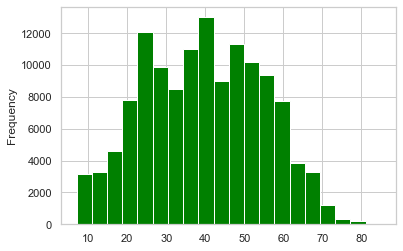

C:\Users\SreeHari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


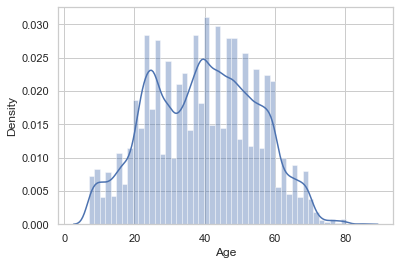

In [42]:
cs_df['Age'].plot(kind='hist',bins=20,color='green')
plt.show()
sns.distplot(cs_df['Age'])
plt.show()


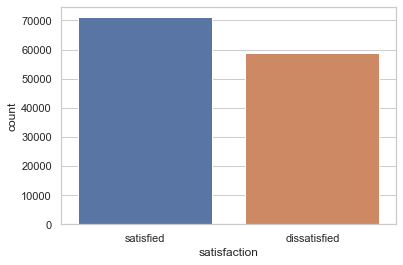

Total number of satisfaction : 71087
Total number of dissatisfaction : 58793


In [43]:
sns.countplot(x=cs_df.satisfaction)
plt.show()
print("Total number of satisfaction : {:}".format(len(cs_df[cs_df["satisfaction"]=="satisfied"])))
print("Total number of dissatisfaction : {:}".format(len(cs_df[cs_df["satisfaction"]=="dissatisfied"])))

From the above graph and the counts of label it is clear that the target variable has binary classification labels and the have enough number of values for both labels to create a Classification ML Model, don't need to upscale the label that has less count

In [44]:
#Now have to deal with null values
#As knew already, "Arrival Delay in Minutes" column has 393 null values 
df_check=cs_df
df_check=df_check[df_check["Arrival Delay in Minutes"].isnull()!=False]
df_check


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
145,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,2,0,...,5,5,4,1,4,2,3,5,20,NaN
246,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1364,0,3,0,...,4,2,1,1,3,4,3,2,0,NaN
710,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1792,0,5,0,...,5,5,4,4,5,3,4,5,24,NaN
736,satisfied,Male,Loyal Customer,9,Personal Travel,Eco,1862,0,5,0,...,3,3,5,3,4,4,4,3,0,NaN
818,dissatisfied,Male,Loyal Customer,9,Personal Travel,Eco,1668,1,0,1,...,4,4,4,5,1,5,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127739,satisfied,Male,Loyal Customer,44,Business travel,Business,3431,2,2,3,...,4,5,5,5,5,5,5,4,70,NaN
128131,satisfied,Male,Loyal Customer,39,Business travel,Business,1595,4,4,4,...,5,5,5,5,5,3,5,5,0,NaN
128710,satisfied,Female,Loyal Customer,45,Business travel,Eco,871,5,1,1,...,2,5,5,5,5,1,5,5,100,NaN
129774,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,1594,5,4,5,...,3,3,1,4,3,3,4,3,0,NaN


This is the data that have only 393 null values in the' Arrival Delay in Minutes' column

In [45]:
df_check.satisfaction.value_counts()

satisfied       205
dissatisfied    188
Name: satisfaction, dtype: int64

In [46]:
print('Satisfied out of null data : ',(len(df_check[df_check['satisfaction']=='satisfied'])/len(df_check.satisfaction))*100)
print('Dissatisfied out of null data : ',(len(df_check[df_check['satisfaction']=='dissatisfied'])/len(df_check.satisfaction))*100)



Satisfied out of null data :  52.16284987277354
Dissatisfied out of null data :  47.837150127226465


In [47]:
print('Satisfied out of actual data : ',len(cs_df[cs_df['satisfaction']=='satisfied'])/len(cs_df.satisfaction))
print('Dissatisfied out of actual data : ',len(cs_df[cs_df['satisfaction']=='dissatisfied'])/len(cs_df.satisfaction))

Satisfied out of actual data :  0.5473283030489683
Dissatisfied out of actual data :  0.4526716969510317


"Arrival Delay in Minutes" column has time value so that we can't fill the null value with any mean or mod value because it won't be correct in anyway because it is the time that indicate delay happened for the Airline.



In [48]:
cs_df_1=cs_df[cs_df['Arrival Delay in Minutes'].isnull()!=True]
cs_df_1

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [49]:
print('Shape of Data with null values  : {} \nShape of Data without null values : {}'.format(cs_df.shape,cs_df_1.shape))
print('Null confirmation : {}'.format(len(cs_df)-len(cs_df_1)))

Shape of Data with null values  : (129880, 23) 
Shape of Data without null values : (129487, 23)
Null confirmation : 393


In [50]:
cs_df_1.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0


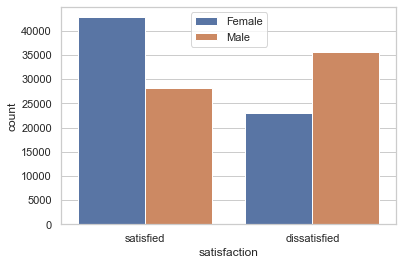

In [51]:
sns.countplot(x='satisfaction',data=cs_df_1,hue='Gender')
plt.legend(loc='upper center')
plt.show()

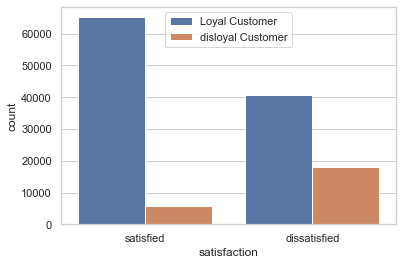

In [52]:
sns.countplot(x='satisfaction',data=cs_df_1,hue='Customer Type')
plt.legend(loc='upper center')
plt.show()

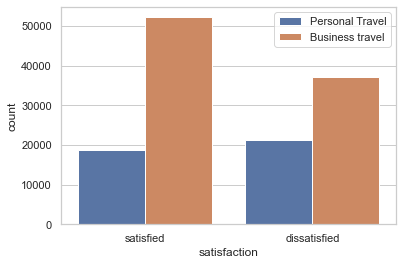

In [53]:
sns.countplot(x='satisfaction',data=cs_df_1,hue='Type of Travel')
plt.legend(loc='upper right')
plt.show()

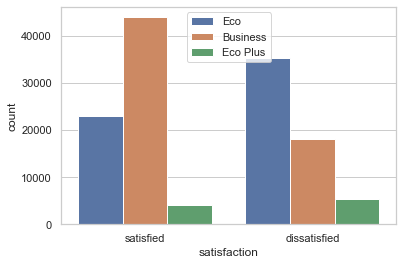

In [54]:
sns.countplot(x='satisfaction',data=cs_df_1,hue='Class')
plt.legend(loc='upper center')
plt.show()

In [55]:
cs_df_1.groupby('satisfaction')['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'].mean()

C:\Users\SreeHari\AppData\Local\Temp\ipykernel_20424\1556636763.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cs_df_1.groupby('satisfaction')['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'].mean()


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,
dissatisfied,37.468373,2025.202833,17.728777,18.504599
satisfied,41.049604,1944.469640,12.092393,12.268883


In [56]:
cs_df_1.select_dtypes(include=[np.number]).columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [57]:
cs_df_1.groupby('satisfaction')['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       ].mean()

C:\Users\SreeHari\AppData\Local\Temp\ipykernel_20424\197296327.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cs_df_1.groupby('satisfaction')['Seat comfort',


,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
satisfaction,,,,,,,,,,,,,,
dissatisfied,2.467315,3.016517,2.660609,3.008003,2.919922,2.609044,2.959833,2.851873,2.972818,3.052555,3.364269,2.971845,3.377203,2.869653
satisfied,3.145552,2.968582,3.010285,2.975805,3.521374,4.024266,3.983085,3.985031,3.872196,3.844587,3.969287,3.645721,3.977639,3.751799


In [58]:
obj_var=list(cs_df_1.select_dtypes(include=['O']).columns)
obj_var

['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

In [60]:
obj_dummies=pd.get_dummies(cs_df_1[obj_var[1:]],prefix=obj_var[1:])
cs_df_1=cs_df_1.join(obj_dummies)
cs_df_1

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,305.0,0,1,1,0,0,1,1,0,0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,0.0,1,0,0,1,0,1,0,1,0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,172.0,0,1,0,1,0,1,1,0,0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,163.0,0,1,0,1,0,1,0,1,0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,205.0,0,1,0,1,0,1,0,1,0


In [61]:
target_dum=pd.get_dummies(cs_df_1['satisfaction'],prefix='satisfaction',drop_first=True)
cs_df_1=cs_df_1.join(target_dum)
cs_df_1.drop(columns=obj_var,axis=1,inplace=True)
cs_df_1

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,65,265,0,0,0,2,2,4,2,3,...,1,0,1,0,0,1,0,1,0,1
1,47,2464,0,0,0,3,0,2,2,3,...,0,1,1,0,0,1,1,0,0,1
2,15,2138,0,0,0,3,2,0,2,2,...,1,0,1,0,0,1,0,1,0,1
3,60,623,0,0,0,3,3,4,3,1,...,1,0,1,0,0,1,0,1,0,1
4,70,354,0,0,0,3,4,3,4,2,...,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,29,1731,5,5,5,3,2,5,2,2,...,1,0,0,1,0,1,0,1,0,1
129876,63,2087,2,3,2,4,2,1,1,3,...,0,1,0,1,0,1,1,0,0,0
129877,69,2320,3,0,3,3,3,2,2,4,...,0,1,0,1,0,1,0,1,0,0
129878,66,2450,3,2,3,2,3,2,2,3,...,0,1,0,1,0,1,0,1,0,0


In [62]:
X=cs_df_1.iloc[:,cs_df_1.columns!='satisfaction_satisfied']
y=cs_df_1.iloc[:,cs_df_1.columns=='satisfaction_satisfied']
X

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,0.0,1,0,1,0,0,1,0,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,305.0,0,1,1,0,0,1,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,0.0,1,0,1,0,0,1,0,1,0
3,60,623,0,0,0,3,3,4,3,1,...,0.0,1,0,1,0,0,1,0,1,0
4,70,354,0,0,0,3,4,3,4,2,...,0.0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,29,1731,5,5,5,3,2,5,2,2,...,0.0,1,0,0,1,0,1,0,1,0
129876,63,2087,2,3,2,4,2,1,1,3,...,172.0,0,1,0,1,0,1,1,0,0
129877,69,2320,3,0,3,3,3,2,2,4,...,163.0,0,1,0,1,0,1,0,1,0
129878,66,2450,3,2,3,2,3,2,2,3,...,205.0,0,1,0,1,0,1,0,1,0


In [63]:
y

,satisfaction_satisfied
0,1
1,1
2,1
3,1
4,1
...,...
129875,1
129876,0
129877,0
129878,0


In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=.17)
print('Shape of X_train : {}'.format(X_train.shape),"\n")
print('Shape of X_test : {}'.format(X_test.shape),"\n")
print('Shape of y_train : {}'.format(y_train.shape),"\n")
print('Shape of y_test : {}'.format(y_test.shape))

Shape of X_train : (107474, 27) 

Shape of X_test : (22013, 27) 

Shape of y_train : (107474, 1) 

Shape of y_test : (22013, 1)


In [81]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
ranfor = RandomForestRegressor(n_estimators = 800, random_state = 1)
rfe=RFE(ranfor,n_features_to_select=22)
rfe=rfe.fit(X_train,y_train.values.ravel())

In [82]:
print(rfe.support_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [83]:
modelsupport=rfe.support_.tolist()
print(modelsupport)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [84]:
index=[]
for idx,colm in enumerate(modelsupport):
    if colm==True:
        index.append(idx)
print('Total number True columns : {}'.format(len(index)))
print(index)

Total number True columns : 22
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [85]:
columns=[]
col_name=X_train.columns
for i,c in enumerate(X_train):
    if i in index:
        columns.append(col_name[i])        
print('Columns that can be used in X_train for prediction :\n\n{}'.format(columns)) 

Columns that can be used in X_train for prediction :

['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Gate location', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender_Male', 'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 'Type of Travel_Business travel', 'Type of Travel_Personal Travel', 'Class_Business']


In [86]:
X_train=X_train[columns]
X_test=X_test[columns]

In [87]:
#from sklearn.ensemble import RandomForestRegressor
#ranfor = RandomForestRegressor(n_estimators = 800, random_state = 1)
ranfor.fit(X_train,y_train)

C:\Users\SreeHari\AppData\Local\Temp\ipykernel_20424\2988626664.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ranfor.fit(X_train,y_train)


RandomForestRegressor(n_estimators=800, random_state=1)

In [88]:
y_pred=ranfor.predict(X_test)
y_pred

array([0.  , 1.  , 0.04, ..., 1.  , 1.  , 1.  ])

In [89]:
print(ranfor.score(X_test,y_test))


0.8754182106325241


In [107]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_pred.round())
confmat

array([[ 9584,   371],
       [  555, 11503]], dtype=int64)

In [108]:
from sklearn.metrics import classification_report
classrep=classification_report(y_test,y_pred.round())
print(classrep)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      9955
           1       0.97      0.95      0.96     12058

    accuracy                           0.96     22013
   macro avg       0.96      0.96      0.96     22013
weighted avg       0.96      0.96      0.96     22013



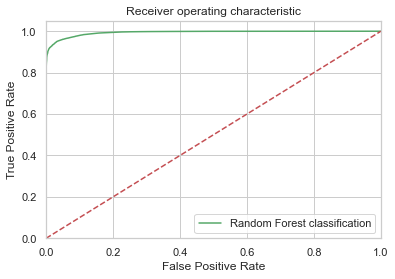

In [111]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ranfor_roc_auc = roc_auc_score(y_test, ranfor.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, ranfor.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Random Forest classification',color='g')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RandomForest_ROC')
plt.show()